In [1]:
import math
import matplotlib.pyplot as plt
import random
import numpy as np
import pandas as pd
from IPython import display
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, f1_score, precision_score
import seaborn as sns

# **Data Generation**

In [2]:
data = []

for i in range(501):
  x1 = random.randint(0,100)
  x2 = random.randint(0,100)
  y = 0

  if 0<=x1<=100 and 0<=x2<=20:
    y = [1,0,0,0,0]
  elif 0<=x1<=100 and 20<x2<=40:
    y = [0,1,0,0,0]
  elif 0<=x1<=100 and 40<x2<=60:
    y = [0,0,1,0,0]
  elif 0<=x1<=100 and 60<x2<=80:
    y = [0,0,0,1,0]
  elif 0<=x1<=100 and 80<x2<=100:
    y = [0,0,0,0,1]

  data.append([[x1, x2], y])

In [3]:
data

[[[83, 83], [0, 0, 0, 0, 1]],
 [[55, 14], [1, 0, 0, 0, 0]],
 [[52, 95], [0, 0, 0, 0, 1]],
 [[53, 75], [0, 0, 0, 1, 0]],
 [[66, 43], [0, 0, 1, 0, 0]],
 [[41, 80], [0, 0, 0, 1, 0]],
 [[100, 100], [0, 0, 0, 0, 1]],
 [[62, 66], [0, 0, 0, 1, 0]],
 [[25, 77], [0, 0, 0, 1, 0]],
 [[22, 45], [0, 0, 1, 0, 0]],
 [[70, 2], [1, 0, 0, 0, 0]],
 [[70, 79], [0, 0, 0, 1, 0]],
 [[72, 22], [0, 1, 0, 0, 0]],
 [[91, 100], [0, 0, 0, 0, 1]],
 [[80, 56], [0, 0, 1, 0, 0]],
 [[84, 79], [0, 0, 0, 1, 0]],
 [[53, 42], [0, 0, 1, 0, 0]],
 [[16, 73], [0, 0, 0, 1, 0]],
 [[29, 49], [0, 0, 1, 0, 0]],
 [[20, 64], [0, 0, 0, 1, 0]],
 [[55, 21], [0, 1, 0, 0, 0]],
 [[77, 96], [0, 0, 0, 0, 1]],
 [[28, 83], [0, 0, 0, 0, 1]],
 [[65, 80], [0, 0, 0, 1, 0]],
 [[41, 78], [0, 0, 0, 1, 0]],
 [[50, 58], [0, 0, 1, 0, 0]],
 [[59, 62], [0, 0, 0, 1, 0]],
 [[6, 12], [1, 0, 0, 0, 0]],
 [[5, 8], [1, 0, 0, 0, 0]],
 [[58, 73], [0, 0, 0, 1, 0]],
 [[13, 68], [0, 0, 0, 1, 0]],
 [[36, 83], [0, 0, 0, 0, 1]],
 [[15, 16], [1, 0, 0, 0, 0]],
 [[81, 78],

In [4]:
X = []
Y = []
for d in data:
  X.append(d[0])
  Y.append(d[1])

X = np.array(X)
Y = np.array(Y)

In [5]:
X_train = X[:400]
Y_train = Y[:400]
X_test = X[400:]
Y_test = Y[400:]

In [6]:
Y_train[0]

array([0, 0, 0, 0, 1])

In [7]:
X_train

array([[ 83,  83],
       [ 55,  14],
       [ 52,  95],
       [ 53,  75],
       [ 66,  43],
       [ 41,  80],
       [100, 100],
       [ 62,  66],
       [ 25,  77],
       [ 22,  45],
       [ 70,   2],
       [ 70,  79],
       [ 72,  22],
       [ 91, 100],
       [ 80,  56],
       [ 84,  79],
       [ 53,  42],
       [ 16,  73],
       [ 29,  49],
       [ 20,  64],
       [ 55,  21],
       [ 77,  96],
       [ 28,  83],
       [ 65,  80],
       [ 41,  78],
       [ 50,  58],
       [ 59,  62],
       [  6,  12],
       [  5,   8],
       [ 58,  73],
       [ 13,  68],
       [ 36,  83],
       [ 15,  16],
       [ 81,  78],
       [ 90,  50],
       [ 41,  98],
       [ 46,  40],
       [ 91,   0],
       [ 32,  96],
       [ 46,  84],
       [ 21,  45],
       [ 28,  63],
       [ 59,  86],
       [ 37,   3],
       [ 99,  61],
       [ 84,  95],
       [ 63,   7],
       [ 91,  54],
       [ 59,  87],
       [ 54,  93],
       [ 25,   6],
       [ 65,  12],
       [ 27,

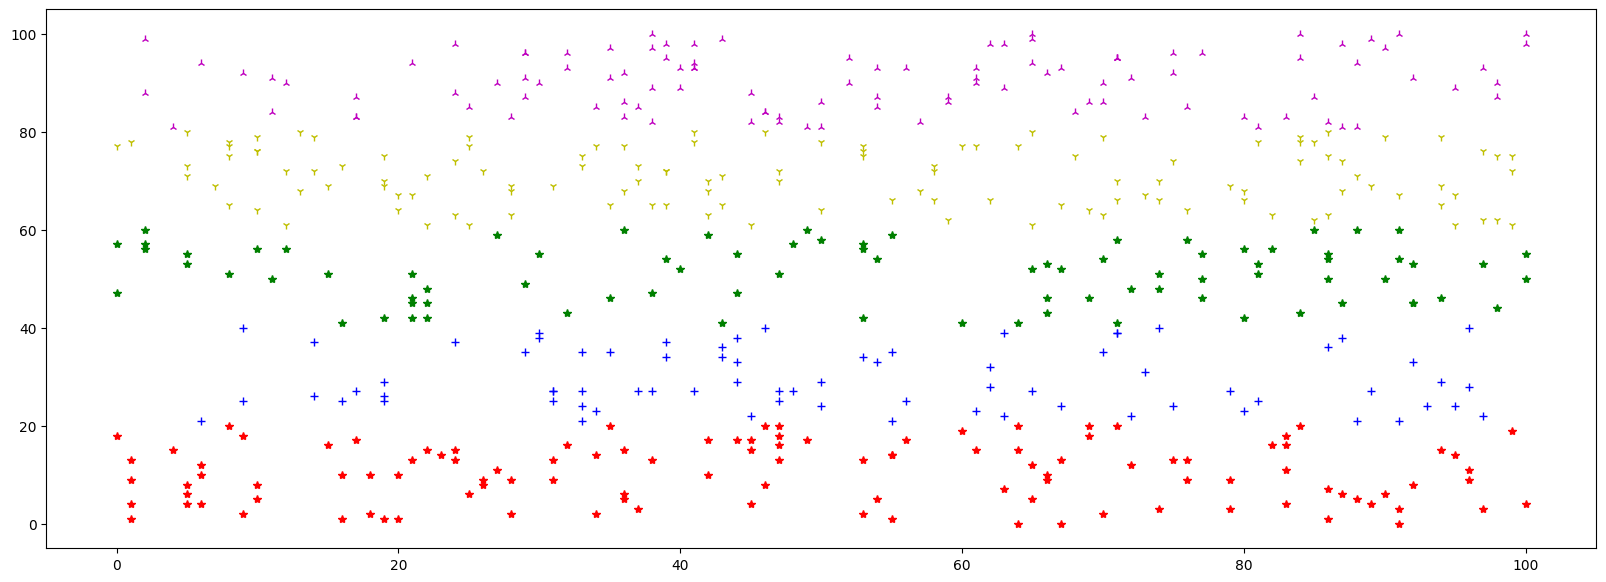

In [8]:
plt.figure(figsize=(20, 7))
for i in range(501):
  if Y[i][0] == 1:
    plt.plot(X[i][0], X[i][1], "r*")
  elif Y[i][1] == 1:
    plt.plot(X[i][0], X[i][1], "b+")
  elif Y[i][2] == 1:
    plt.plot(X[i][0], X[i][1], "g*")
  elif Y[i][3] == 1:
    plt.plot(X[i][0], X[i][1], "y1")
  elif Y[i][4] == 1:
    plt.plot(X[i][0], X[i][1], "m2")

plt.show()

# **Neural Network**

In [9]:
class NeuralNetwork(object):
    def __init__(self, hiddenLayer1Neurons = 10, hiddenLayer2Neurons = 10, hiddenLayer3Neurons = 10, learningRate = 0.1):
        inputLayerNeurons = 2
        outLayerNeurons = 5

        self.learning_rate = learningRate
        self.W_H1 = np.random.randn(inputLayerNeurons, hiddenLayer1Neurons)
        self.W_H2 = np.random.randn(hiddenLayer1Neurons, hiddenLayer2Neurons)
        self.W_H3 = np.random.randn(hiddenLayer2Neurons, hiddenLayer3Neurons)
        self.W_O = np.random.randn(hiddenLayer3Neurons, outLayerNeurons)

        self.B_H1 = np.random.randn(hiddenLayer1Neurons)
        self.B_H2 = np.random.randn(hiddenLayer2Neurons)
        self.B_H3 = np.random.randn(hiddenLayer3Neurons)
        self.B_O = np.random.randn(outLayerNeurons)

    def sigmoid(self, x, der=False):
        if der:
            return x * (1 - x)
        else:
            return 1 / (1 + np.exp(-x))

    def feedForward(self, X):
        # Calculate hidden layer 1 input and output
        hidden1_input = np.dot(X, self.W_H1) + self.B_H1
        self.hidden1_output = self.sigmoid(hidden1_input)

        # Calculate hidden layer 2 input and output
        hidden2_input = np.dot(self.hidden1_output, self.W_H2) + self.B_H2
        self.hidden2_output = self.sigmoid(hidden2_input)

        # Calculate hidden layer 3 input and output
        hidden3_input = np.dot(self.hidden2_output, self.W_H3) + self.B_H3
        self.hidden3_output = self.sigmoid(hidden3_input)

        # Calculate output layer input and output
        output_input = np.dot(self.hidden3_output, self.W_O) + self.B_O
        pred = self.sigmoid(output_input)
        return pred

    def backPropagation(self, X, Y, pred):
        # Calculate error at output
        output_error = Y - pred
        output_delta = self.learning_rate * output_error * self.sigmoid(pred, der=True)

        # Calculate error at hidden layer 3
        hidden3_error = output_delta.dot(self.W_O.T)
        hidden3_delta = self.learning_rate * hidden3_error * self.sigmoid(self.hidden3_output, der=True)

        # Calculate error at hidden layer 2
        hidden2_error = hidden3_delta.dot(self.W_H3.T)
        hidden2_delta = self.learning_rate * hidden2_error * self.sigmoid(self.hidden2_output, der=True)

        # Calculate error at hidden layer 1
        hidden1_error = hidden2_delta.dot(self.W_H2.T)
        hidden1_delta = self.learning_rate * hidden1_error * self.sigmoid(self.hidden1_output, der=True)

        # Update weights
        self.W_H1 += X.T.dot(hidden1_delta)
        self.W_H2 += self.hidden1_output.T.dot(hidden2_delta)
        self.W_H3 += self.hidden2_output.T.dot(hidden3_delta)
        self.W_O += self.hidden3_output.T.dot(output_delta)

        # Update Biases
        self.B_H1 += self.learning_rate * np.sum(hidden1_delta, axis=0)
        self.B_H2 += self.learning_rate * np.sum(hidden2_delta, axis=0)
        self.B_H3 += self.learning_rate * np.sum(hidden3_delta, axis=0)
        self.B_O += self.learning_rate * np.sum(output_delta, axis=0)

    def train(self, X, Y):
        output = self.feedForward(X)
        self.backPropagation(X, Y, output)

Epoch: 0, error: 0.19987839630189996
Epoch: 1000, error: 0.11181474925216128
Epoch: 2000, error: 0.11732513198374903
Epoch: 3000, error: 0.10947711600118126
Epoch: 4000, error: 0.10411114617579538
Epoch: 5000, error: 0.10608466553599323
Epoch: 6000, error: 0.12591780605443084
Epoch: 7000, error: 0.11494853817401487
Epoch: 8000, error: 0.10373626404089101
Epoch: 9000, error: 0.10364410579722756


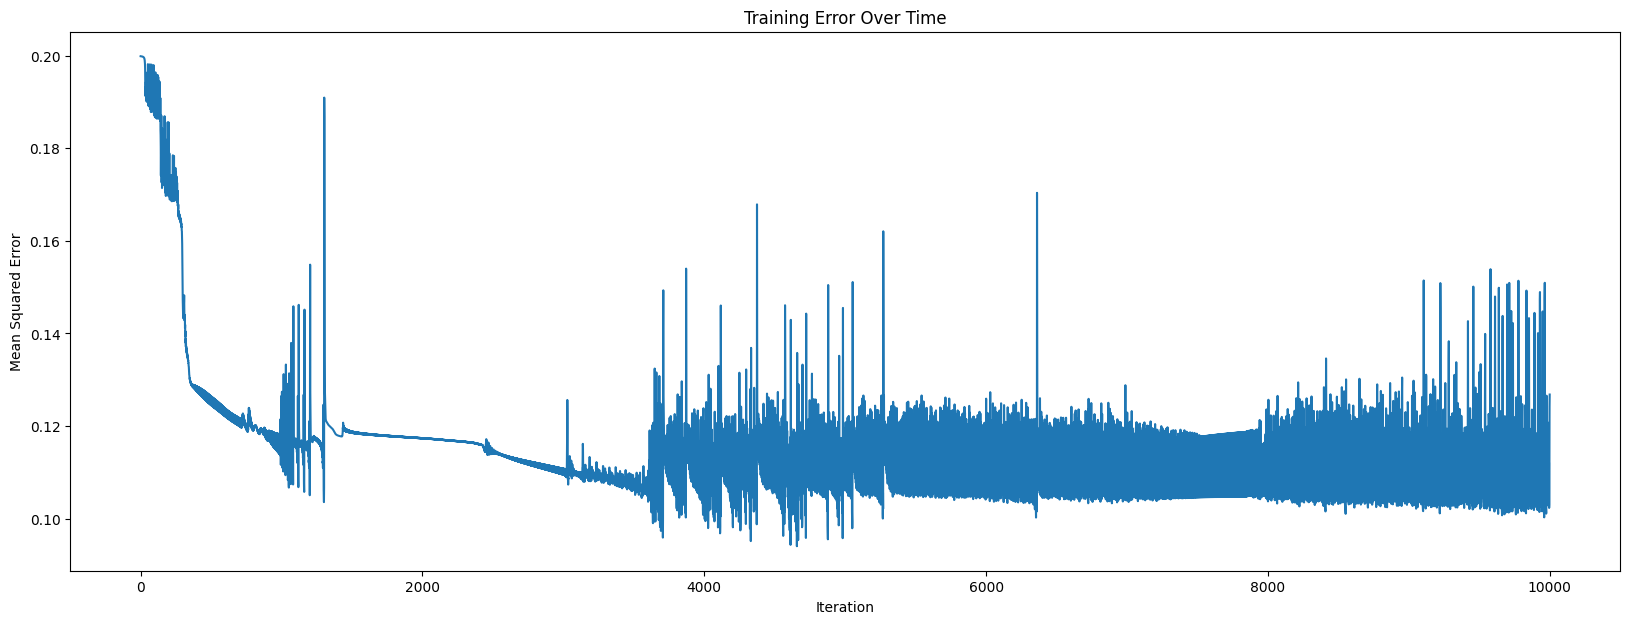

In [10]:
NN = NeuralNetwork()

err = []
for i in range(10000):
  NN.train(X_train, Y_train)
  err.append(np.mean(np.square(Y_train - NN.feedForward(X_train))))

  if i % 1000 == 0:
    print(f'Epoch: {i}, error: {err[i]}')

plt.figure(figsize=(20, 7))
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Training Error Over Time')
plt.show()

# **Evaluate Random Input**

In [11]:
# Returns probability of all classes
def getProb(pred):
    return {f'Class-{index}': p*100 for index, p in enumerate(pred)}

In [12]:
# returns the highest probablity
def getClass(dict):
  max_key = max(dict, key=dict.get)
  return (max_key)

In [13]:
pred = NN.feedForward([50, 30])
print(pred)
print(getProb(pred))
print(getClass(getProb(pred)))

[0.00522474 0.10037743 0.39712803 0.36592882 0.19888171]
{'Class-0': np.float64(0.5224738065902645), 'Class-1': np.float64(10.037743129202887), 'Class-2': np.float64(39.71280338292265), 'Class-3': np.float64(36.59288242229229), 'Class-4': np.float64(19.888171032299013)}
Class-2


# **Evalution Matrics**

In [14]:
predictions = NN.feedForward(X_test)

Y_true = np.argmax(Y_test, axis=1)
Y_pred = np.argmax(predictions, axis=1)

accuracy = accuracy_score(Y_true, Y_pred)
precision = precision_score(Y_true, Y_pred, average = None)
recall = recall_score(Y_true, Y_pred, average = 'macro')
f1 = f1_score(Y_true, Y_pred, average = 'macro')

for i in range(5):
    print(f"Class {i}: Precision: {precision[i]}")

print(f"Overall accuracy: {accuracy}")
print(f"Overall Recall: {recall}")
print(f"Overall F1 Score: {f1}")
print(f"Overall Precision: {np.average(precision)}")


Class 0: Precision: 1.0
Class 1: Precision: 0.21739130434782608
Class 2: Precision: 0.0
Class 3: Precision: 0.32558139534883723
Class 4: Precision: 0.48
Overall accuracy: 0.38613861386138615
Overall Recall: 0.3820579420579421
Overall F1 Score: 0.33918824957623456
Overall Precision: 0.4045945399393327


# Documentation

## Modifications Made:

As previous Neural Network was for 2 distinct classes with 2 hidden layer, some modifications are made for the 3 hidden layer with 5 distinct classes. Such as -
1. 'outLayerNeurons' value was changed from 2 to 5
2. 'hiddenLayer3Neurons' variable was added to hold the newly added hidden layer.
3. 5 random Biases was added.
4. 2 Extra weights was added.
5. During forward propagation, input and output was calculated for 'hiddenLayer3Neurons'.
6. During back propagation, error and delca was calculated for hidden layer 3.

## Challenges:

1. Generating a balanced dataset was the main challenge, as imbalanced dataset can lead to poor perfomance.
2. Difficulities were faced while visualizing the results.

# **Result and Analysis**

## Confusion Matrix

In [15]:
# Confusion matrix
def conf_matrix(Y_true, Y_pred, c = 'Reds'):
  conf_matrix = confusion_matrix(Y_true, Y_pred)
  print("Confusion Matrix:")
  print(conf_matrix)

  plt.figure(figsize=(10, 7))
  sns.heatmap(conf_matrix, annot=True, fmt='d', cmap=c)
  plt.xlabel('Predicted')
  plt.ylabel('True')
  plt.title('Confusion Matrix')
  plt.show()

Confusion Matrix:
[[ 8 14  1  3  0]
 [ 0  5  1  7  1]
 [ 0  4  0  9  6]
 [ 0  0  0 14  6]
 [ 0  0  0 10 12]]


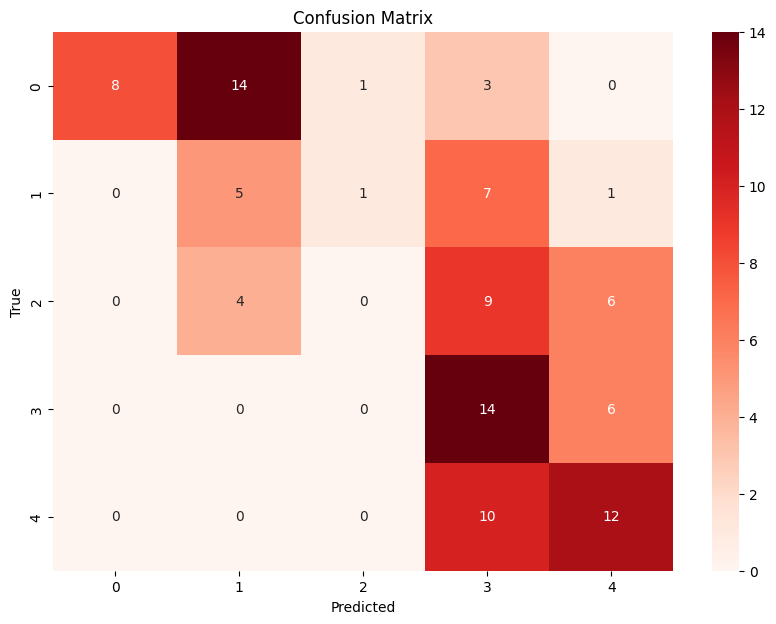

In [16]:
conf_matrix(Y_true, Y_pred)

## Insights:

1. The neural network successfully learned to classify the synthetic dataset with five classes.
2. The sigmoid activation function and cross-entropy loss were effective in handling the multi-class classification problem.
3. The training loss decreased over epochs, indicating that the model was learning effectively.

# After Changing Parameters

Epoch: 0, error: 0.11106459783935324
Epoch: 1000, error: 0.10635235159820547
Epoch: 2000, error: 0.10920308022840894
Epoch: 3000, error: 0.13108172761279502
Epoch: 4000, error: 0.11229847107571037
Epoch: 5000, error: 0.10250337814028314
Epoch: 6000, error: 0.10913151237138863
Epoch: 7000, error: 0.11565337040135135
Epoch: 8000, error: 0.09711166330502206
Epoch: 9000, error: 0.10587735306051133


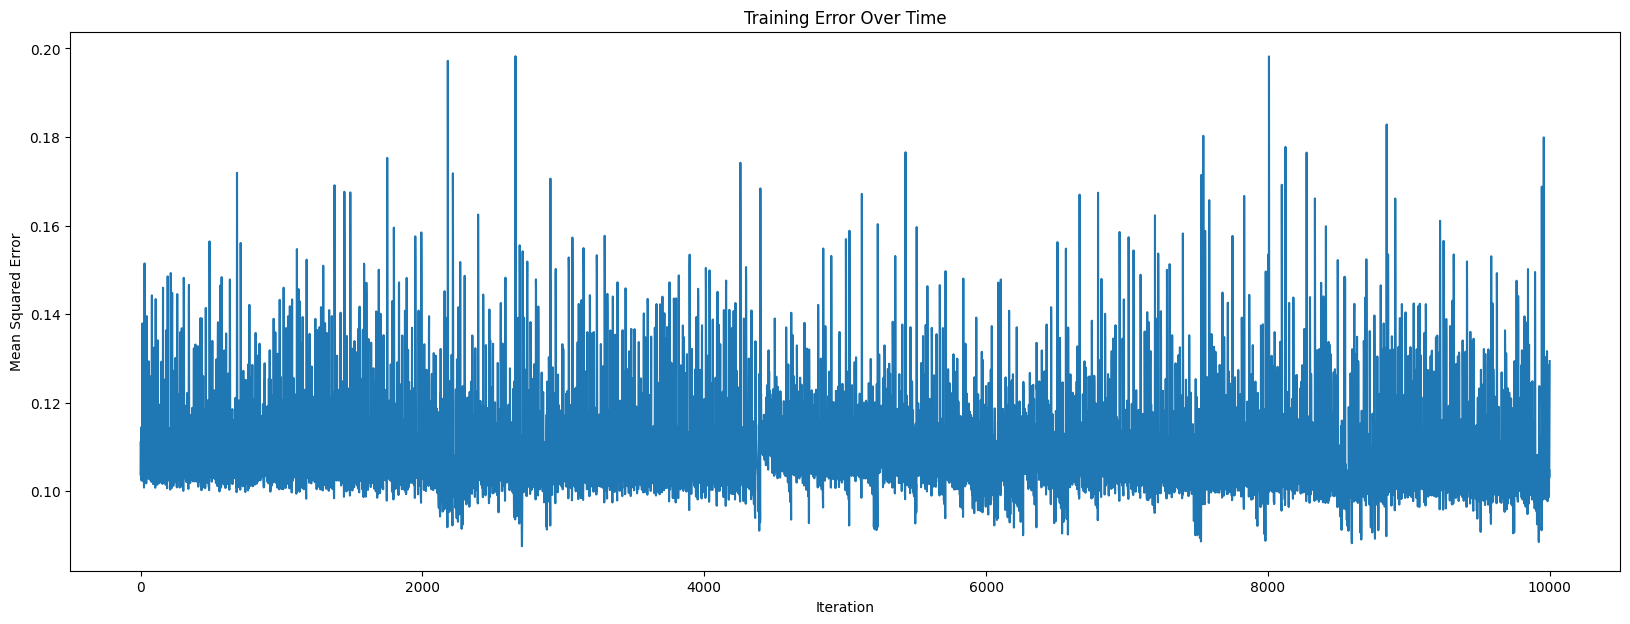

In [17]:
new_nn = NeuralNetwork(hiddenLayer1Neurons=20, hiddenLayer2Neurons=20, hiddenLayer3Neurons=20, learningRate=0.01)


err = []
for i in range(10000):
  NN.train(X_train, Y_train)
  err.append(np.mean(np.square(Y_train - NN.feedForward(X_train))))

  if i % 1000 == 0:
    # err_list.append(err)
    print(f'Epoch: {i}, error: {err[i]}')

plt.figure(figsize=(20, 7))
plt.plot(err)
plt.xlabel('Iteration')
plt.ylabel('Mean Squared Error')
plt.title('Training Error Over Time')
plt.show()


In [18]:
predictions1 = new_nn.feedForward(X_test)

Y_true1 = np.argmax(Y_test, axis=1)
Y_pred1 = np.argmax(predictions1, axis=1)

# Confusion Matrix

Confusion Matrix:
[[ 0  0  0  0 26]
 [ 0  0  0  0 14]
 [ 0  0  3  0 16]
 [ 0  0  4  0 16]
 [ 0  0  2  0 20]]


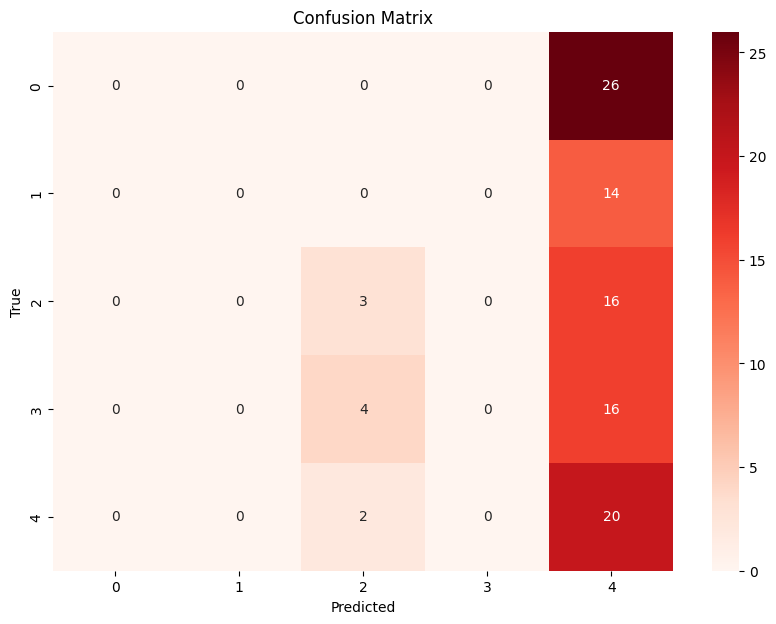

In [19]:
conf_matrix(Y_true1, Y_pred1)

In [20]:
accuracy = accuracy_score(Y_true1, Y_pred1)
precision = precision_score(Y_true1, Y_pred1, average = None)
recall = recall_score(Y_true1, Y_pred1, average = 'macro')
f1 = f1_score(Y_true1, Y_pred1, average = 'macro')

for i in range(5):
    print(f"Class {i}: Precision: {precision[i]}")

print(f"Overall accuracy: {accuracy}")
print(f"Overall Recall: {recall}")
print(f"Overall F1 Score: {f1}")
print(f"Overall Precision: {np.average(precision)}")

Class 0: Precision: 0.0
Class 1: Precision: 0.0
Class 2: Precision: 0.3333333333333333
Class 3: Precision: 0.0
Class 4: Precision: 0.21739130434782608
Overall accuracy: 0.22772277227722773
Overall Recall: 0.21339712918660286
Overall F1 Score: 0.11303258145363408
Overall Precision: 0.11014492753623188


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Comparizon

<h4>Comparison of Model Configurations</h4>
<table style="font-size:18px; border-collapse: collapse;">
  <tr>
    <th style="border: 1px solid #ddd; padding: 8px;">Configuration</th>
    <th style="border: 1px solid #ddd; padding: 8px;">Accuracy</th>
    <th style="border: 1px solid #ddd; padding: 8px;">Recall (macro)</th>
    <th style="border: 1px solid #ddd; padding: 8px;">F₁ Score (macro)</th>
    <th style="border: 1px solid #ddd; padding: 8px;">Precision (macro)</th>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;"><strong>3 layers × 10 neurons, η = 0.1</strong></td>
    <td style="border: 1px solid #ddd; padding: 8px; text-align:center;">38.6%</td>
    <td style="border: 1px solid #ddd; padding: 8px; text-align:center;">38.2%</td>
    <td style="border: 1px solid #ddd; padding: 8px; text-align:center;">33.9%</td>
    <td style="border: 1px solid #ddd; padding: 8px; text-align:center;">40.5%</td>
  </tr>
  <tr>
    <td style="border: 1px solid #ddd; padding: 8px;"><strong>3 layers × 20 neurons, η = 0.01</strong></td>
    <td style="border: 1px solid #ddd; padding: 8px; text-align:center;">22.8%</td>
    <td style="border: 1px solid #ddd; padding: 8px; text-align:center;">21.3%</td>
    <td style="border: 1px solid #ddd; padding: 8px; text-align:center;">11.3%</td>
    <td style="border: 1px solid #ddd; padding: 8px; text-align:center;">1.0%</td>
  </tr>
</table>

<h4><strong>Key Observations:</strong></h4>
<ul style="font-size:16px;">
  <li>The <strong>10‑neuron</strong> setup at <em>η=0.1</em> achieves moderate performance across all metrics, showing the network learns distinguishing patterns.</li>
  <li>Doubling to <strong>20 neurons</strong> with a smaller <em>η=0.01</em> causes a sharp drop—indicating underfitting or collapsed predictions.</li>
</ul>


# **Conclusion**

<h4 style="font-size:22px;"><strong>Summary of Findings</strong></h4>
<ul style="font-size:20px; line-height:1.5;">
  <li>A network with <strong>3 hidden layers</strong>, <strong>10 neurons each</strong>, and <strong>η = 0.1</strong> achieved:</li>
    <ul style="font-size:18px; line-height:1.4;">
      <li><strong>Accuracy:</strong> 38.6%</li>
      <li><strong>Recall (macro):</strong> 38.2%</li>
      <li><strong>F₁ Score (macro):</strong> 33.9%</li>
      <li><strong>Precision (macro):</strong> 40.5%</li>
    </ul>
  <li>Increasing to <strong>20 neurons per layer</strong> and reducing to <strong>η = 0.01</strong> dropped performance to:</li>
    <ul style="font-size:18px; line-height:1.4;">
      <li><strong>Accuracy:</strong> 22.8%</li>
     <li><strong>Recall (macro):</strong> 21.3%</li>
     <li><strong>F₁ Score (macro):</strong> 11.3%</li>
     <li><strong>Precision (macro):</strong> 11.0%</li>
    </ul>
</ul>

<h4 style="font-size:22px;"><strong>Key Takeaways & Next Steps</strong></h4>
<ul style="font-size:20px; line-height:1.5;">
  <li><strong>Model capacity vs. learning rate:</strong>  
    Over‑parameterization with too small a learning rate led to under‑learning and collapsed class predictions.</li>
  <li><strong>Activation & Loss:</strong>  
    Switch from sigmoid+MSE to <em>softmax + categorical cross‑entropy</em> for better convergence in multiclass tasks.</li>
  <li><strong>Optimizer & Batching:</strong>  
    Use an adaptive optimizer (e.g., Adam) and mini‑batch training (e.g., batch size = 32) to stabilize updates.</li>
  <li><strong>Regularization & Validation:</strong>  
    Introduce dropout or L₂ weight decay, and implement early stopping based on a validation set to prevent collapse.</li>
  <li><strong>Hyperparameter Search:</strong>  
    Systematically explore hidden‑layer sizes (5–30 neurons), learning rates (10⁻³–10⁻¹), and optimizers to find the optimal setup.</li>
</ul>

<h4 style="font-size:20px; text-align:center;"><em>Implementing these steps should substantially boost your network’s ability to distinguish among all five classes – pushing accuracy well beyond the current ~40%.</em></h4>
